 # Interceptación de proyectil por otro proyectil. Sympy


# Inicializando Sympy
Este paquete carga sympy y lo prepara para trabajar.
Es necesario para utilizar la "t" como parámetro

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.8 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



El comando init_session llevaría a cabo algunas acciones por nostros:

    Gracias a use_latex=True obtenemos la salida en 𝐿𝐴𝑇𝐸𝑋.
    Crea una serie de variables para que podamos ponernos a trabajar en el momento.

Para más información, accceder a la documentación de Sympy:

https://docs.sympy.org/latest/index.html

Creamos los simbolos habituales (reales y complejos) así como las Funciones

In [2]:
a, b, c = symbols('a b c')   # La opción symbols('a',real=TRUE) restringiría el rango de la variable

In [3]:
C = symbols('C', complex='True')

In [4]:
w = symbols('Omega')
W = symbols('omega')
w, W

Importamos las librerías correspondientes así como definimos una función que permite seleccionar la solución correcta entre las posibles.

In [5]:
# Comenzamos importando las funciones que vamos a utilizar:
#   * gráfico interno a documento
#   * importamos funciones de dibujo
#   * importamos libreria de operaciones numéricas con arrays

%matplotlib inline
from ipywidgets import interactive, fixed
from matplotlib import pyplot as plt
import numpy as np
import math

In [6]:
# Definimos la función Sol_correcta(solución_lista) que escoge la solución
# correcta. 

def Sol_correcta(s):
    # Es solución única
    if len(s)>1:                   # Si es doble solución...
        if s[0]*s[1]<0:            #  Si tienen diferente signo
            t_sol=max(s[0],s[1])   #    la solución es la mayor de ellas
        else:                      #  Si tiene el mismo signo (mal ambos neg)
            t_sol=min(s[0],s[1])   #    la solución es la menor de ellas
    else:                          # es solución única
        t_sol = s[0]               #    para evitar que sea una lista
    return(t_sol)

***
***
# Enunciado
***
***

Un vehículo que circula a 140 km·h⁻¹ llega al borde de un precipicio de 60 m de alto.

Un segundo más tarde, un sistema inteligente de rastreo localiza el vehículo y lanza un proyectil a 160 km·h⁻¹ con un ángulo de elevación de 30º.

Determina dónde y cuando se encuentran.

### Ecuaciones de movimiento del coche
---
Comenzamos indicando los datos iniciales del coche para poder obtener sus ecuaciones de movimiento.

In [7]:
# Datos iniciales
x_coche_0 = 0         # m
y_coche_0 = 60        # m
v_coche_x_0 = 140 /3.6  # m·s-1
v_coche_y_0 = 0       # m·s-1
g = 9.81              # m·s-2

# Condiciones de contorno finales
y_coche_final = 30    # m

In [24]:
# Ecuaciones de movimiento del Coche
#    Posición
x_coche = x_coche_0 + v_coche_x_0 * t
y_coche = y_coche_0 + v_coche_y_0 * t - 1/2 * g * t**2
#    Velocidad
v_coche_x = v_coche_x_0
v_coche_y = v_coche_y_0 - g * t

print('Las ecuaciones de movimiento son:')
print('   x_coche = ',x_coche,' m')
print('   y_coche =',y_coche,' m\n')
print('Las ecuaciones de velocidad son:')
print('   v_coche_x =',v_coche_x,' m·s⁻¹')
print('   v_coche_y =',v_coche_y,' m·s⁻¹')

Las ecuaciones de movimiento son:
   x_coche =  38.8888888888889*t  m
   y_coche = 60 - 4.905*t**2  m

Las ecuaciones de velocidad son:
   v_coche_x = 38.888888888888886  m·s⁻¹
   v_coche_y = -9.81*t  m·s⁻¹


También es posible determinar el tiempo que habría tardado el coche en llegar al suelo. Resolvemos la ecuación de movimiento donde la altura final es cero y obtendremos dos posible soluciones.

In [9]:
# Llega al suelo el coche sin impacto
t_suelo = solve(Eq(y_coche,0))
t_suelo

De estre estas soluciones, nos quedaremos con la correcta. Esta nos indicará un valor máximo al tiempo en que el proyectil tiene que encontrar al coche.

In [10]:
t_suelo_OK = Sol_correcta(t_suelo)
print("La solución es:",t_suelo_OK)

La solución es: 3.49748708391334


### Ecuaciones de movimiento del proyectil
---
 Comenzamos con los datos iniciales del proyectil y definimos las ecuaciones.

In [20]:
# Datos iniciales
x_proyectil_0 = 0     # m
y_proyectil_0 = 0     # m
v_proyectil   = 160/3.6  # m·s-1
ang_lanzamiento = 30
v_proyectil_x_0 = v_proyectil*math.cos(ang_lanzamiento*pi/180) 
v_proyectil_y_0 = v_proyectil*math.sin(ang_lanzamiento*pi/180)
print('Velocidad horizontal del proyectil: ',v_proyectil_x_0,' m·s⁻¹')
print('Velocidad vertical del proyectil: ',v_proyectil_y_0,' m·s⁻¹')

Velocidad horizontal del proyectil:  38.49001794597505  m·s⁻¹
Velocidad vertical del proyectil:  22.22222222222222  m·s⁻¹


In [23]:
# Ecuaciones de movimiento del Proyectil
#    Posición
x_proyectil = x_proyectil_0 + v_proyectil_x_0 * t
y_proyectil = y_proyectil_0 + v_proyectil_y_0 * t - 1/2 * g * t**2
#    Velocidad
v_proyectil_x = v_proyectil_x_0
v_proyectil_y = v_proyectil_y_0 - g * t

print('Las ecuaciones de movimiento son:')
print('   x_proyectil = ',x_proyectil,' m')
print('   y_proyectil =',y_proyectil,' m')
print('\nLas ecuaciones de velocidad son:')
print('   v_proyectil_x =',v_proyectil_x,' m·s⁻¹')
print('   v_proyectil_y =',v_proyectil_y,' m·s⁻¹')

Las ecuaciones de movimiento son:
   x_proyectil =  38.490017945975*t  m
   y_proyectil = -4.905*t**2 + 22.2222222222222*t  m

Las ecuaciones de velocidad son:
   v_proyectil_x = 38.49001794597505  m·s⁻¹
   v_proyectil_y = 22.2222222222222 - 9.81*t  m·s⁻¹


Determinemos el lugar de intersección

In [12]:
Interseccion= Eq(y_coche,y_proyectil);
print('Igualando las ecuaciones de altura: \n');
Interseccion

Igualando las ecuaciones de altura: 



In [13]:
solucion=solve(Interseccion);
print('\nLas soluciones a su punto de encuentro son: ',solucion)


Las soluciones a su punto de encuentro son:  [2.70000000000000]


Analicemos la solución:
   * si es única será la correcta
   * si es doble, nos quedaremos con la positiva
   * Si es doble y ambas positivas, nos quedamos con al menor

En consecuencia, el tiempo que tardan en encontrarse ambos cuerpos es:

In [14]:
t_sol = Sol_correcta(solucion)
print("La solución correcta es:",t_sol)

La solución correcta es: 2.70000000000000


## Punto de encuentro
---
A partir del resultado anterior, es sencillo obtener los valores del punto de encuentro y las velocidades de impacto.

In [15]:
x_impacto = x_coche.subs(t,t_sol)
y_impacto = y_coche.subs(t,t_sol)

print('Se encuentran en el punto (',x_impacto,y_impacto,') m')

Se encuentran en el punto ( 105.000000000000 24.2425500000000 ) m


In [17]:
v_coche_impacto_x = v_coche_x
v_coche_impacto_y = v_coche_y.subs(t,t_sol)
v_coche_impacto = math.sqrt(v_coche_impacto_x**2+v_coche_impacto_y**2)
print('Lo que corresponde a un valor de ',v_coche_impacto,'m·s⁻¹')
print('La velocidad del coche es (',v_coche_impacto_x,v_coche_impacto_y,') m·s⁻¹')
if v_coche_impacto_y <0:
    print('El coche está bajando.')
else:
    print('El coche está subiendo.')

Lo que corresponde a un valor de  47.0521715546939 m·s⁻¹
La velocidad del coche es ( 38.888888888888886 -26.4870000000000 ) m·s⁻¹
El coche está bajando.


In [18]:
v_proyectil_impacto_x = v_proyectil_x
v_proyectil_impacto_y = v_proyectil_y.subs(t,t_sol)
v_proyectil_impacto = math.sqrt(v_proyectil_impacto_x**2+v_proyectil_impacto_y**2)
print('Lo que corresponde a un valor de ',v_proyectil_impacto,'m·s⁻¹')
print('La velocidad del coche es (',v_proyectil_impacto_x,v_proyectil_impacto_y,') m·s⁻¹')
if v_proyectil_impacto_y <0:
    print('El proyectil está bajando.')
else:
    print('El proyectil está subiendo.')

Lo que corresponde a un valor de  38.725570505485244 m·s⁻¹
La velocidad del coche es ( 38.49001794597505 -4.26477777777778 ) m·s⁻¹
El proyectil está bajando.


### Representación gráfica
---
A partir de las ecuaciones de movimiento se representan las trayectorias de los cuerpos y se verifica el resultado previamente obtenido.

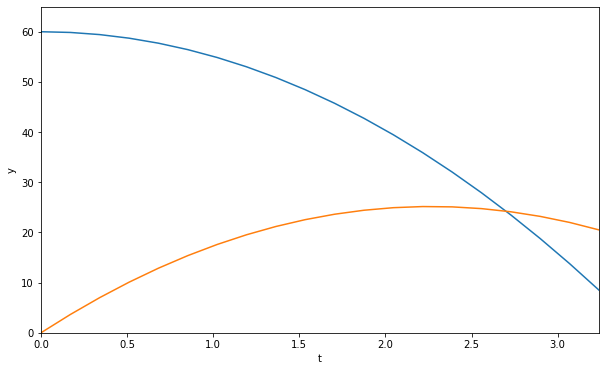

In [19]:
# Dibujando las ecuaciones
t_lin=np.linspace(0,int(t_sol*1.2*1e3)/1e3,num=20)

# Creamos el array y lo rellenamos de ceros
y_caida_graf  = np.zeros(len(t_lin))
y_subida_graf = np.zeros(len(t_lin))

# Ahora rellenamos el array con los valores que le corresponden
for  i in range(len(t_lin)):
    y_caida_graf[i]  = y_coche.subs(t,t_lin[i])
    y_subida_graf[i] = y_proyectil.subs(t,t_lin[i])

# Ahora definimos el tamaño del gráfico a más grande
plt.figure(figsize=(10,6))
# y delimitamos la región a representar => np.int() is deprecate, utilizar int()
plt.xlim(0,int(t_sol*1.2*1e3)/1e3)
plt.ylim(0,65)

# Introducimos leyendas
plt.xlabel('t')
plt.ylabel('y')

# Representamos las funciones
plt.plot(t_lin,y_caida_graf)
plt.plot(t_lin,y_subida_graf)
